Context
The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

Objective
The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

Data Description
The data contains the different data related to a food order. The detailed data dictionary is given below.

Data Dictionary
order_id: Unique ID of the order
customer_id: ID of the customer who ordered the food
restaurant_name: Name of the restaurant
cuisine_type: Cuisine ordered by the customer
cost: Cost of the order
day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
rating: Rating given by the customer out of 5
food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

In [45]:
#import the necessary python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
# alternative upload csv document from personal C: using jupyter notebook
# data = pd.read_csv(r"C:\Users\demet\OneDrive\Documents\Python Scripts\foodhub_order.csv")

In [47]:
# For google.colab import and mount drive
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('/content/foodhub_order.csv')

Saving foodhub_order.csv to foodhub_order (1).csv


In [48]:
# read data from csv and assign reference
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [49]:
# Question 1: How many rows and columns are present within the data
print(data.shape)
print(f"Row count : {data.shape[0]}")
print(f"Column count: {data.shape[1]}")

(1898, 9)
Row count : 1898
Column count: 9


In [50]:
# Question 2: What are the datatypes of the different columns in the dataset?

In [51]:
data.dtypes

,0
order_id,int64
customer_id,int64
restaurant_name,object
cuisine_type,object
cost_of_the_order,float64
day_of_the_week,object
rating,object
food_preparation_time,int64
delivery_time,int64


In [75]:
# Question 3: Are there any missing values in the data? If yes, treat them using an appropriate method?
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1162.0,NaN,NaN,NaN,4.344234,0.741478,3.0,4.0,5.0,5.0,5.0
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0
revenue,1898.0,NaN,NaN,NaN,3.248842,2.295598,0.0,1.812,2.121,5.574375,8.8525


In [76]:
missing_values = data.isnull().sum()
missing_values

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,736
food_preparation_time,0
delivery_time,0
revenue,0


In [54]:
for column in data.columns:
  if data[column].isnull().any():
    if data[column].dtype in ['int64', 'float64']:
      data[column] = data[column].fillna(data[column].mean())
    else:
      data[column] = data[column].fillna(data[column].mode().loc[0])




In [55]:
# Question 4: Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?
(data.describe())

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [56]:
prep_time = {
    "Minimum": data["food_preparation_time"].min(),
    "Maximum": data["food_preparation_time"].max(),
    "Average": data["food_preparation_time"].mean()
}
prep_time

{'Minimum': 20, 'Maximum': 35, 'Average': 27.371970495258168}

In [77]:
# Question 5: How many orders are not rated?
data['rating'].isnull().sum()

736

In [58]:
#For visualizations going forward tell Python to display the graphs
%matplotlib inline

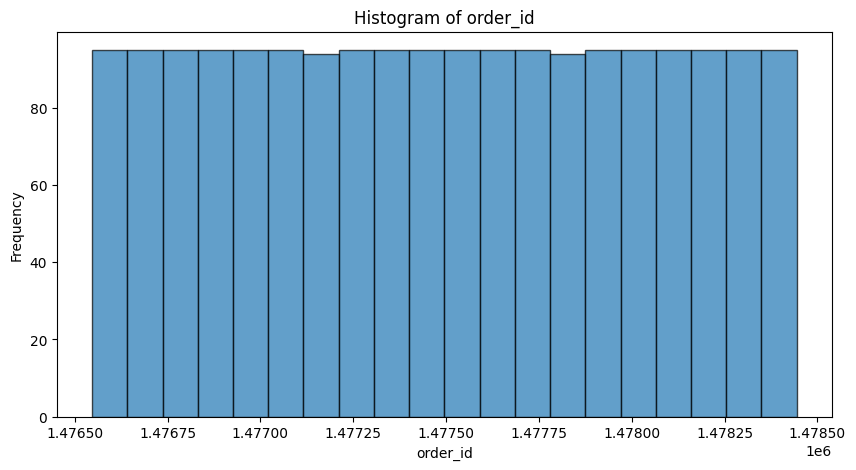

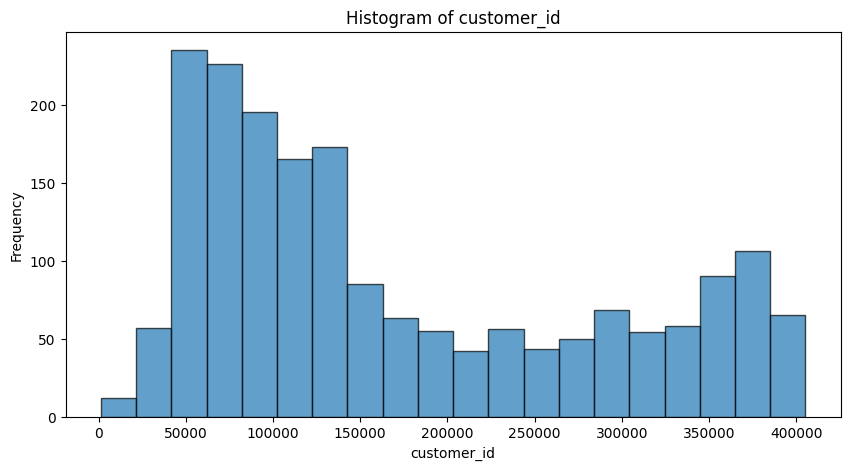

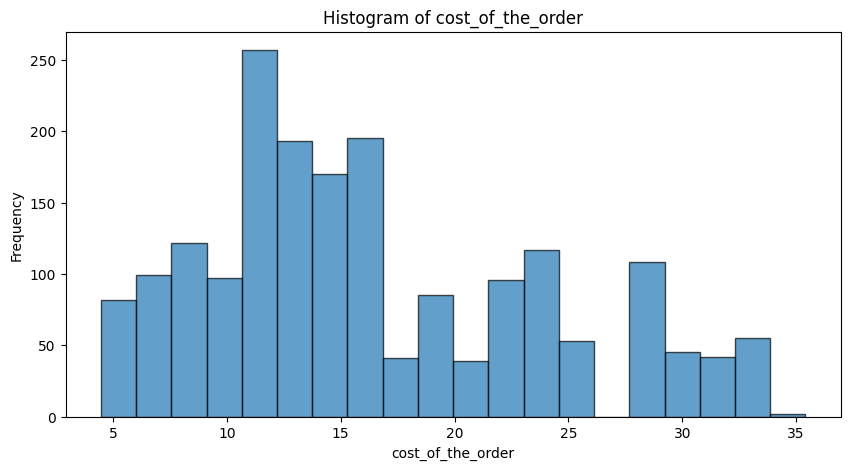

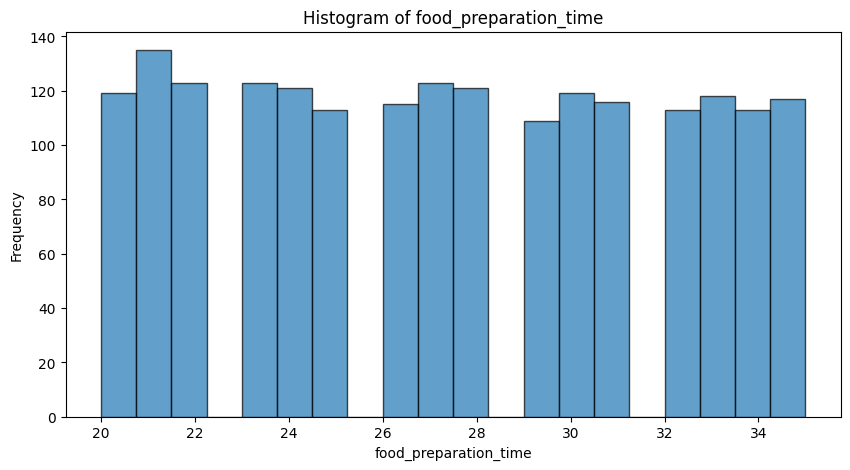

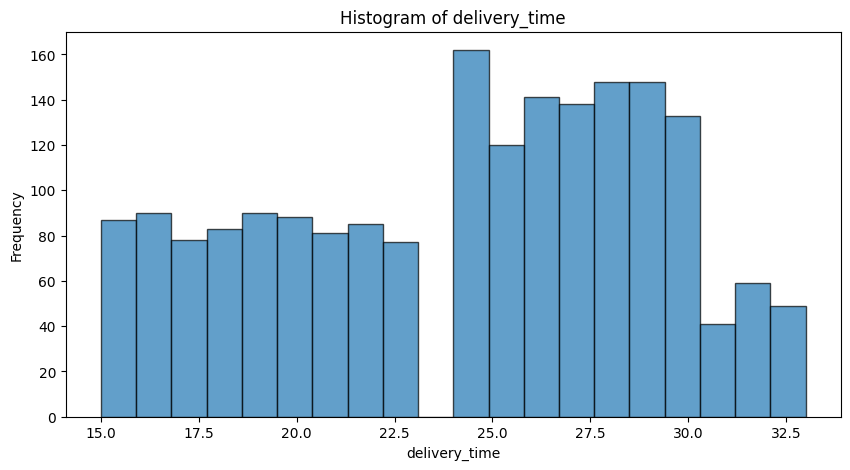

In [59]:
# Question 6: Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

numeric_columns = data.select_dtypes(include=['int64','float64']).columns
for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    plt.hist(data[column], bins=20, edgecolor='k', alpha=0.7)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


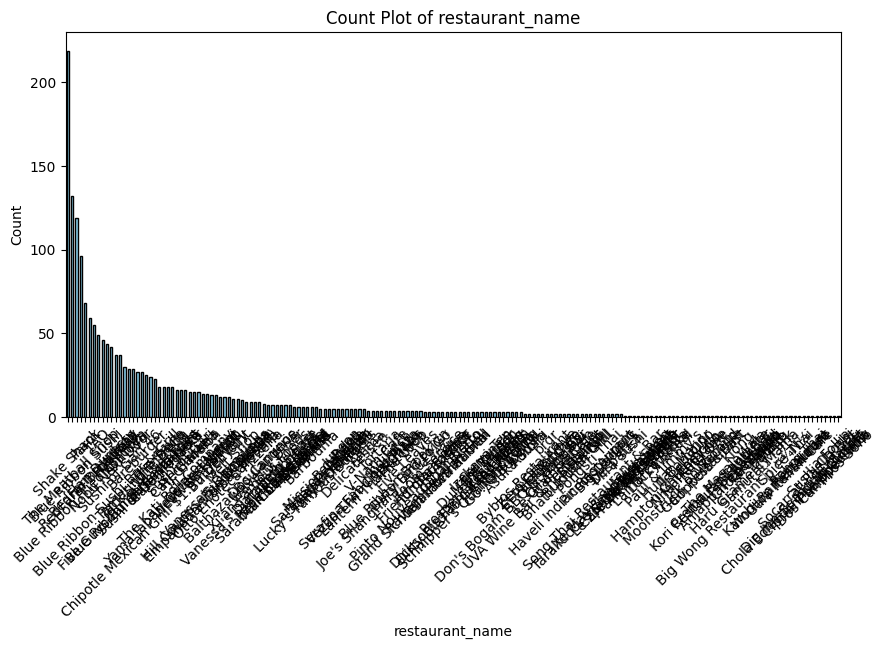

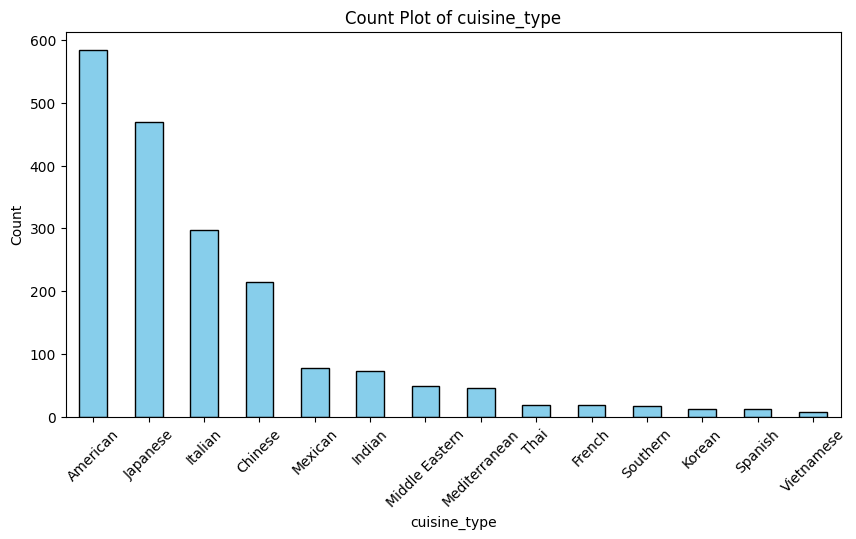

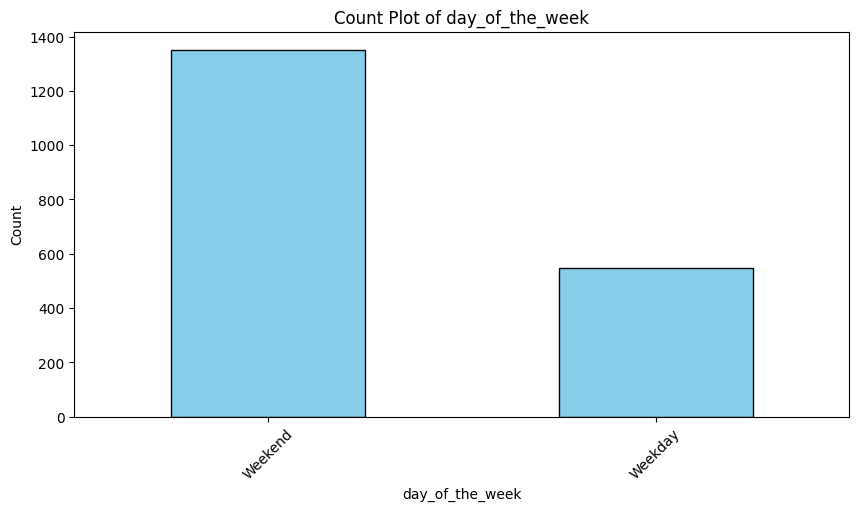

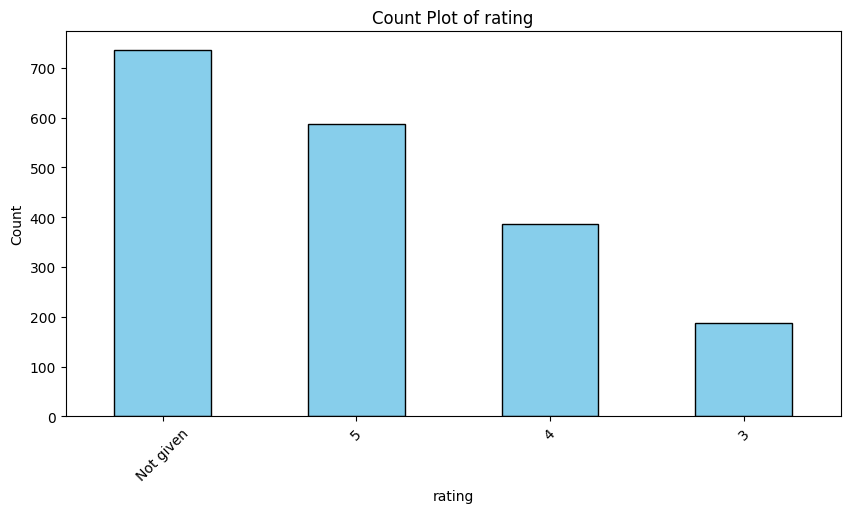

In [60]:
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns = [col for col in categorical_columns if col != 'restraurant_name']
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    data[column].value_counts().plot(kind='bar', color='skyblue', edgecolor='k')
    plt.title(f"Count Plot of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


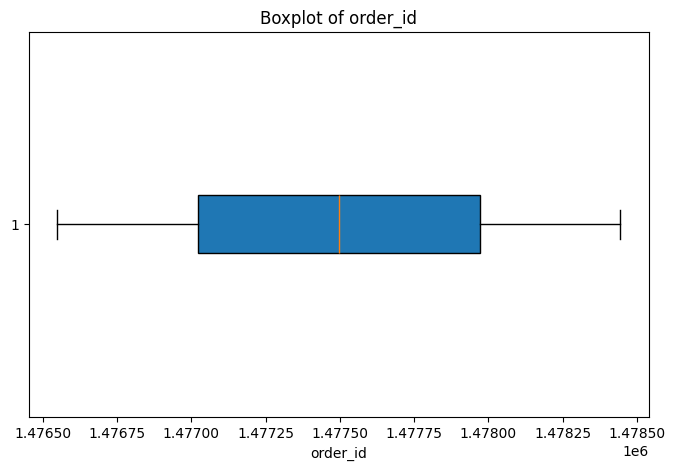

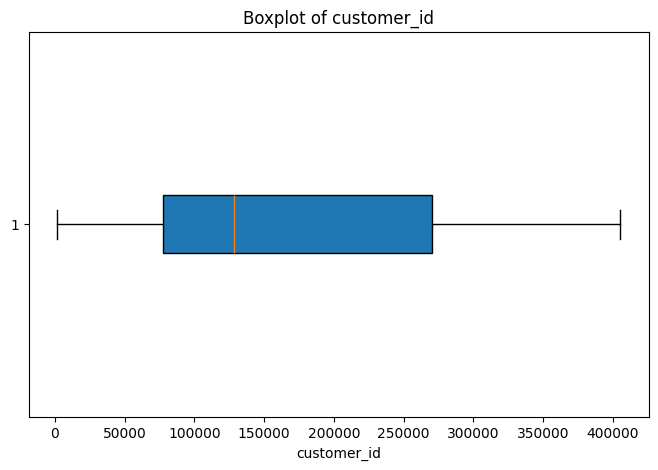

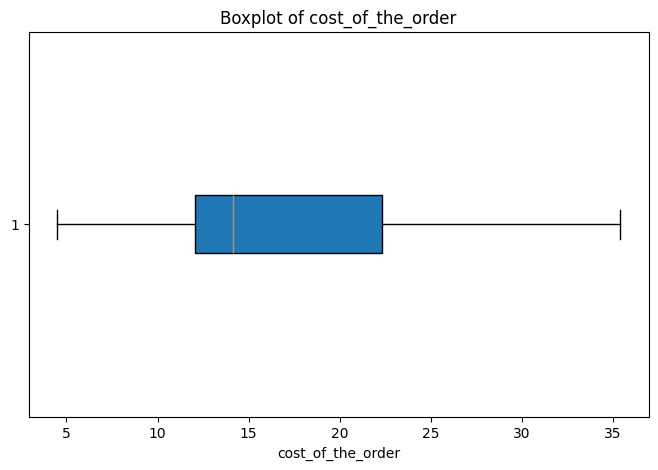

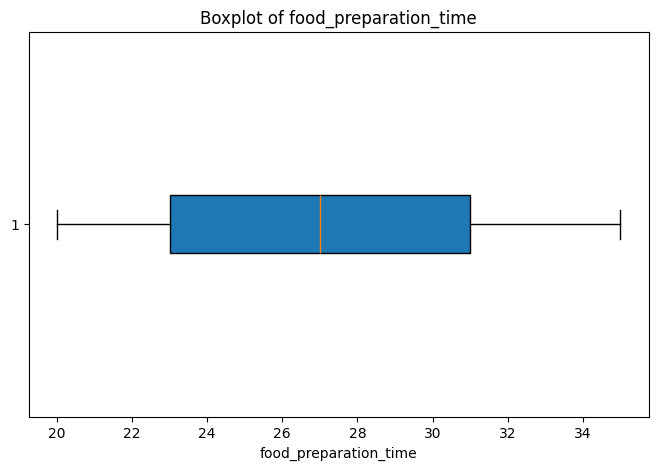

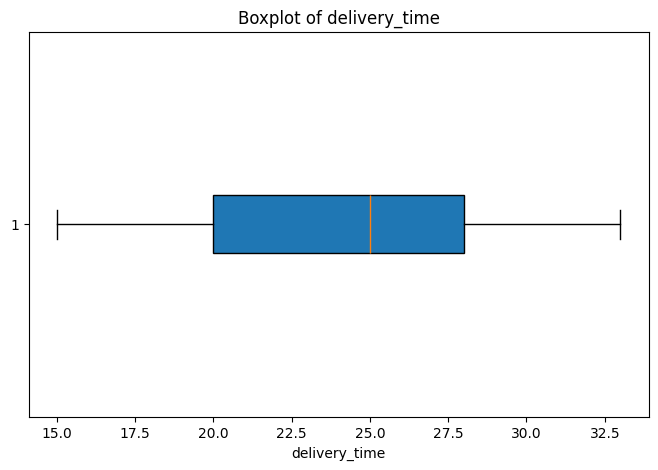

In [61]:
numeric_columns = data.select_dtypes(include=['int64','float64']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.boxplot(data[column], vert=False, patch_artist=True)
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.show()

In [62]:
#Question 7: Which are the top 5 restaurants in terms of the number of orders received?
top5 = data['restaurant_name'].value_counts().head(5)
top5

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


In [63]:
Last5 = data['restaurant_name'].value_counts().tail(5)
Last5

,count
restaurant_name,
Sushi Choshi,1
Dos Caminos Soho,1
La Follia,1
Philippe Chow,1
'wichcraft,1


In [64]:
# Question 8: Which is the most popular cuisine on weekends?
weekend_data = data[data['day_of_the_week'] == 'Weekend']
most_pop_weekend = weekend_data['cuisine_type'].value_counts().head(5)
most_pop_weekend

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53


<ipython-input-65-33c1e2fd6d2c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=most_pop_weekend.index, y=most_pop_weekend.values, palette="deep")


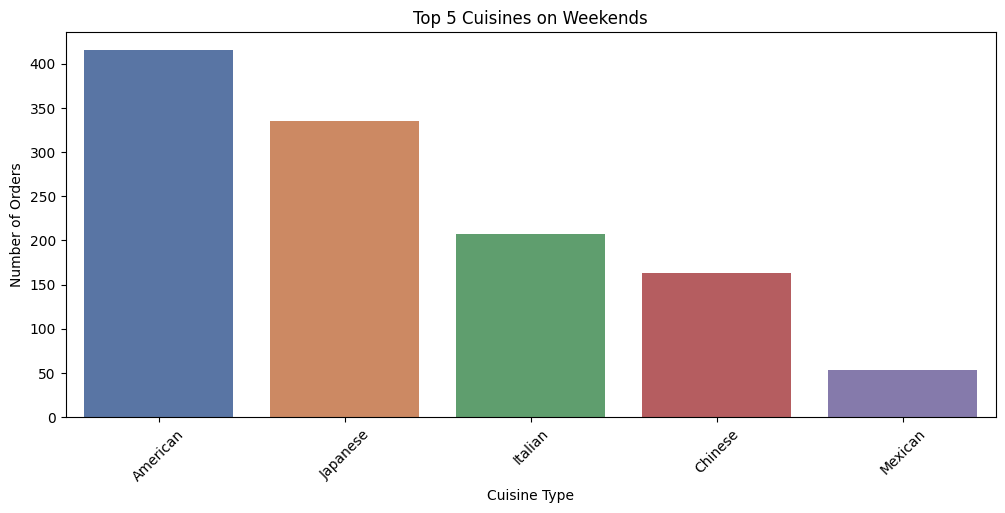

In [65]:
plt.figure(figsize=(12,5))
sns.barplot(x=most_pop_weekend.index, y=most_pop_weekend.values, palette="deep")
plt.title("Top 5 Cuisines on Weekends")
plt.xlabel("Cuisine Type")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()

In [66]:
# Question 9: What percentage of the orders cost more than 20 dollars?
orders_above20 = data[data['cost_of_the_order'] > 20].shape[0]
total_orders = data.shape[0]
Percent_Orders_over20= (round((orders_above20/total_orders)*100, 2))
Percent_Orders_over20

29.24

In [67]:
# Question 10: What is the mean order delivery time?
delivery_mean = round(data['delivery_time'].mean(), 1)
delivery_mean

24.2

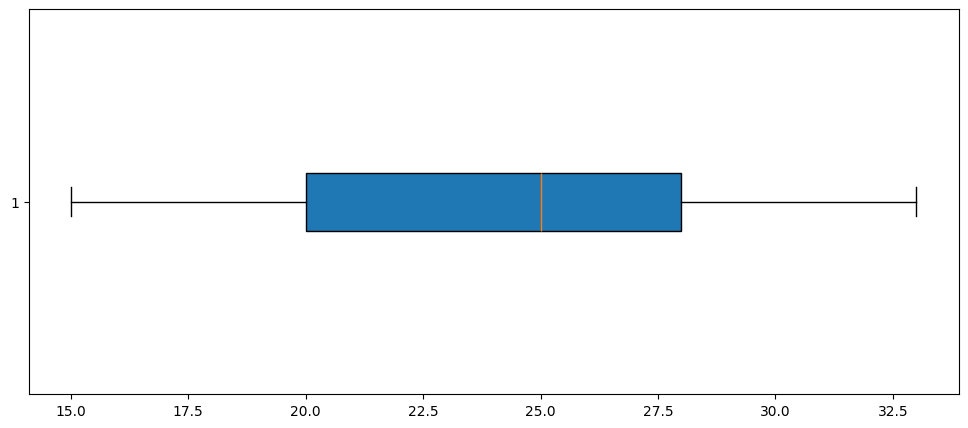

In [68]:
plt.figure(figsize=(12,5))
plt.boxplot(data['delivery_time'], vert=False, patch_artist=True)
plt.show()

In [69]:
# Question 11: The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed
Top3_cust = data['customer_id'].value_counts().head(3)
Top3_cust

,count
customer_id,
52832,13
47440,10
83287,9


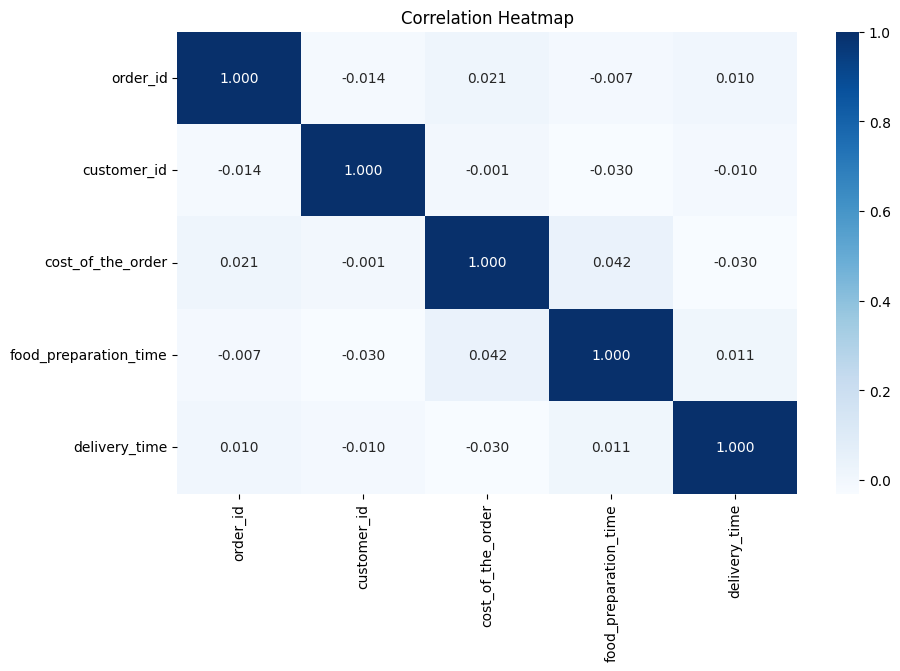

In [70]:
# Question 12: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)?
numeric_data_relat = data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_data_relat.corr(), annot=True, cmap="Blues", fmt=".3f")
plt.title("Correlation Heatmap")
plt.show()

In [71]:
#Question 13: The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

restaurant_stats = data.groupby('restaurant_name').agg(
    rating_count=('rating', 'count'),
    average_rating=('rating', 'mean')
)

eligible_restaurants = restaurant_stats[
    (restaurant_stats['rating_count'] > 50) & (restaurant_stats['average_rating'] > 4)
].reset_index()

eligible_restaurants


,restaurant_name,rating_count,average_rating
0,Blue Ribbon Fried Chicken,64,4.328125
1,Blue Ribbon Sushi,73,4.219178
2,Shake Shack,133,4.278195
3,The Meatball Shop,84,4.511905


In [72]:
# Question 14: The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders?
data['revenue'] = 0.0
data.loc[data['cost_of_the_order'] > 20, 'revenue'] = data['cost_of_the_order'] * .25
data.loc[(data['cost_of_the_order'] > 5) & (data['cost_of_the_order'] <= 20), 'revenue'] = data['cost_of_the_order'] * .15
total_revenue = data['revenue'].sum()
total_revenue

6166.303

In [73]:
# Question 15: The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)
data['total_delivery_time'] = data['food_preparation_time'] + data['delivery_time']
orders_above60 = data[data['total_delivery_time'] > 60].shape[0]
percent_above60 = round((orders_above60 / total_orders) *100, 2)
percent_above60

10.54

In [74]:
# Question 16: The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?
avg_delivery_by_time_and_day = data.groupby('day_of_the_week')['delivery_time'].mean()
avg_delivery_by_time_and_day = avg_delivery_by_time_and_day.round(2)
avg_delivery_by_time_and_day

,delivery_time
day_of_the_week,
Weekday,28.34
Weekend,22.47


In [74]:
# Question 17: What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)
American food is one of the most popular on the weekends, deliveries are often faster on the weekends. It would be a good idea to focus more on weekend based marketing events to capitalize on busier periods of the week.